In [1]:
%matplotlib inline
%config InlineBackend.format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.figsize'] = (10,6)

# Boston Housing Data

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes

## Attribute Information:

1. CRIM      per capita crime rate by town    
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.                
3. INDUS     proportion of non-retail business acres per town    
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)                 
5. NOX       nitric oxides concentration (parts per 10 million)   
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in \$ 1000's

8. Missing Attribute Values:  None.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("data/boston.csv")
print(df.columns)
df.describe()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.CHAS = df['CHAS'].astype(np.bool)

In [5]:
df[df.CHAS].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,True,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,True,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,True,0.871,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,True,0.871,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,True,0.605,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50,27.0


In [6]:
df.aggregate({'AGE':['min', max, np.median, np.mean]})

,AGE
min,2.900000
max,100.000000
median,77.500000
mean,68.574901


In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


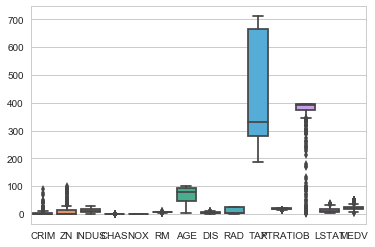

In [8]:
sns.set_style("whitegrid")
sns.boxplot(data=df); 

In [9]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

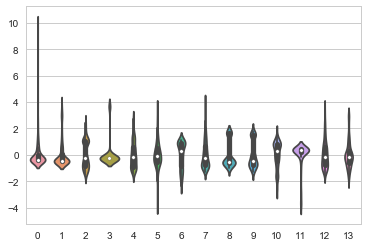

In [10]:
sns.violinplot(data=df_scaled); 

plus de variabilité dans "petal length", et très peu dans "sepal width"

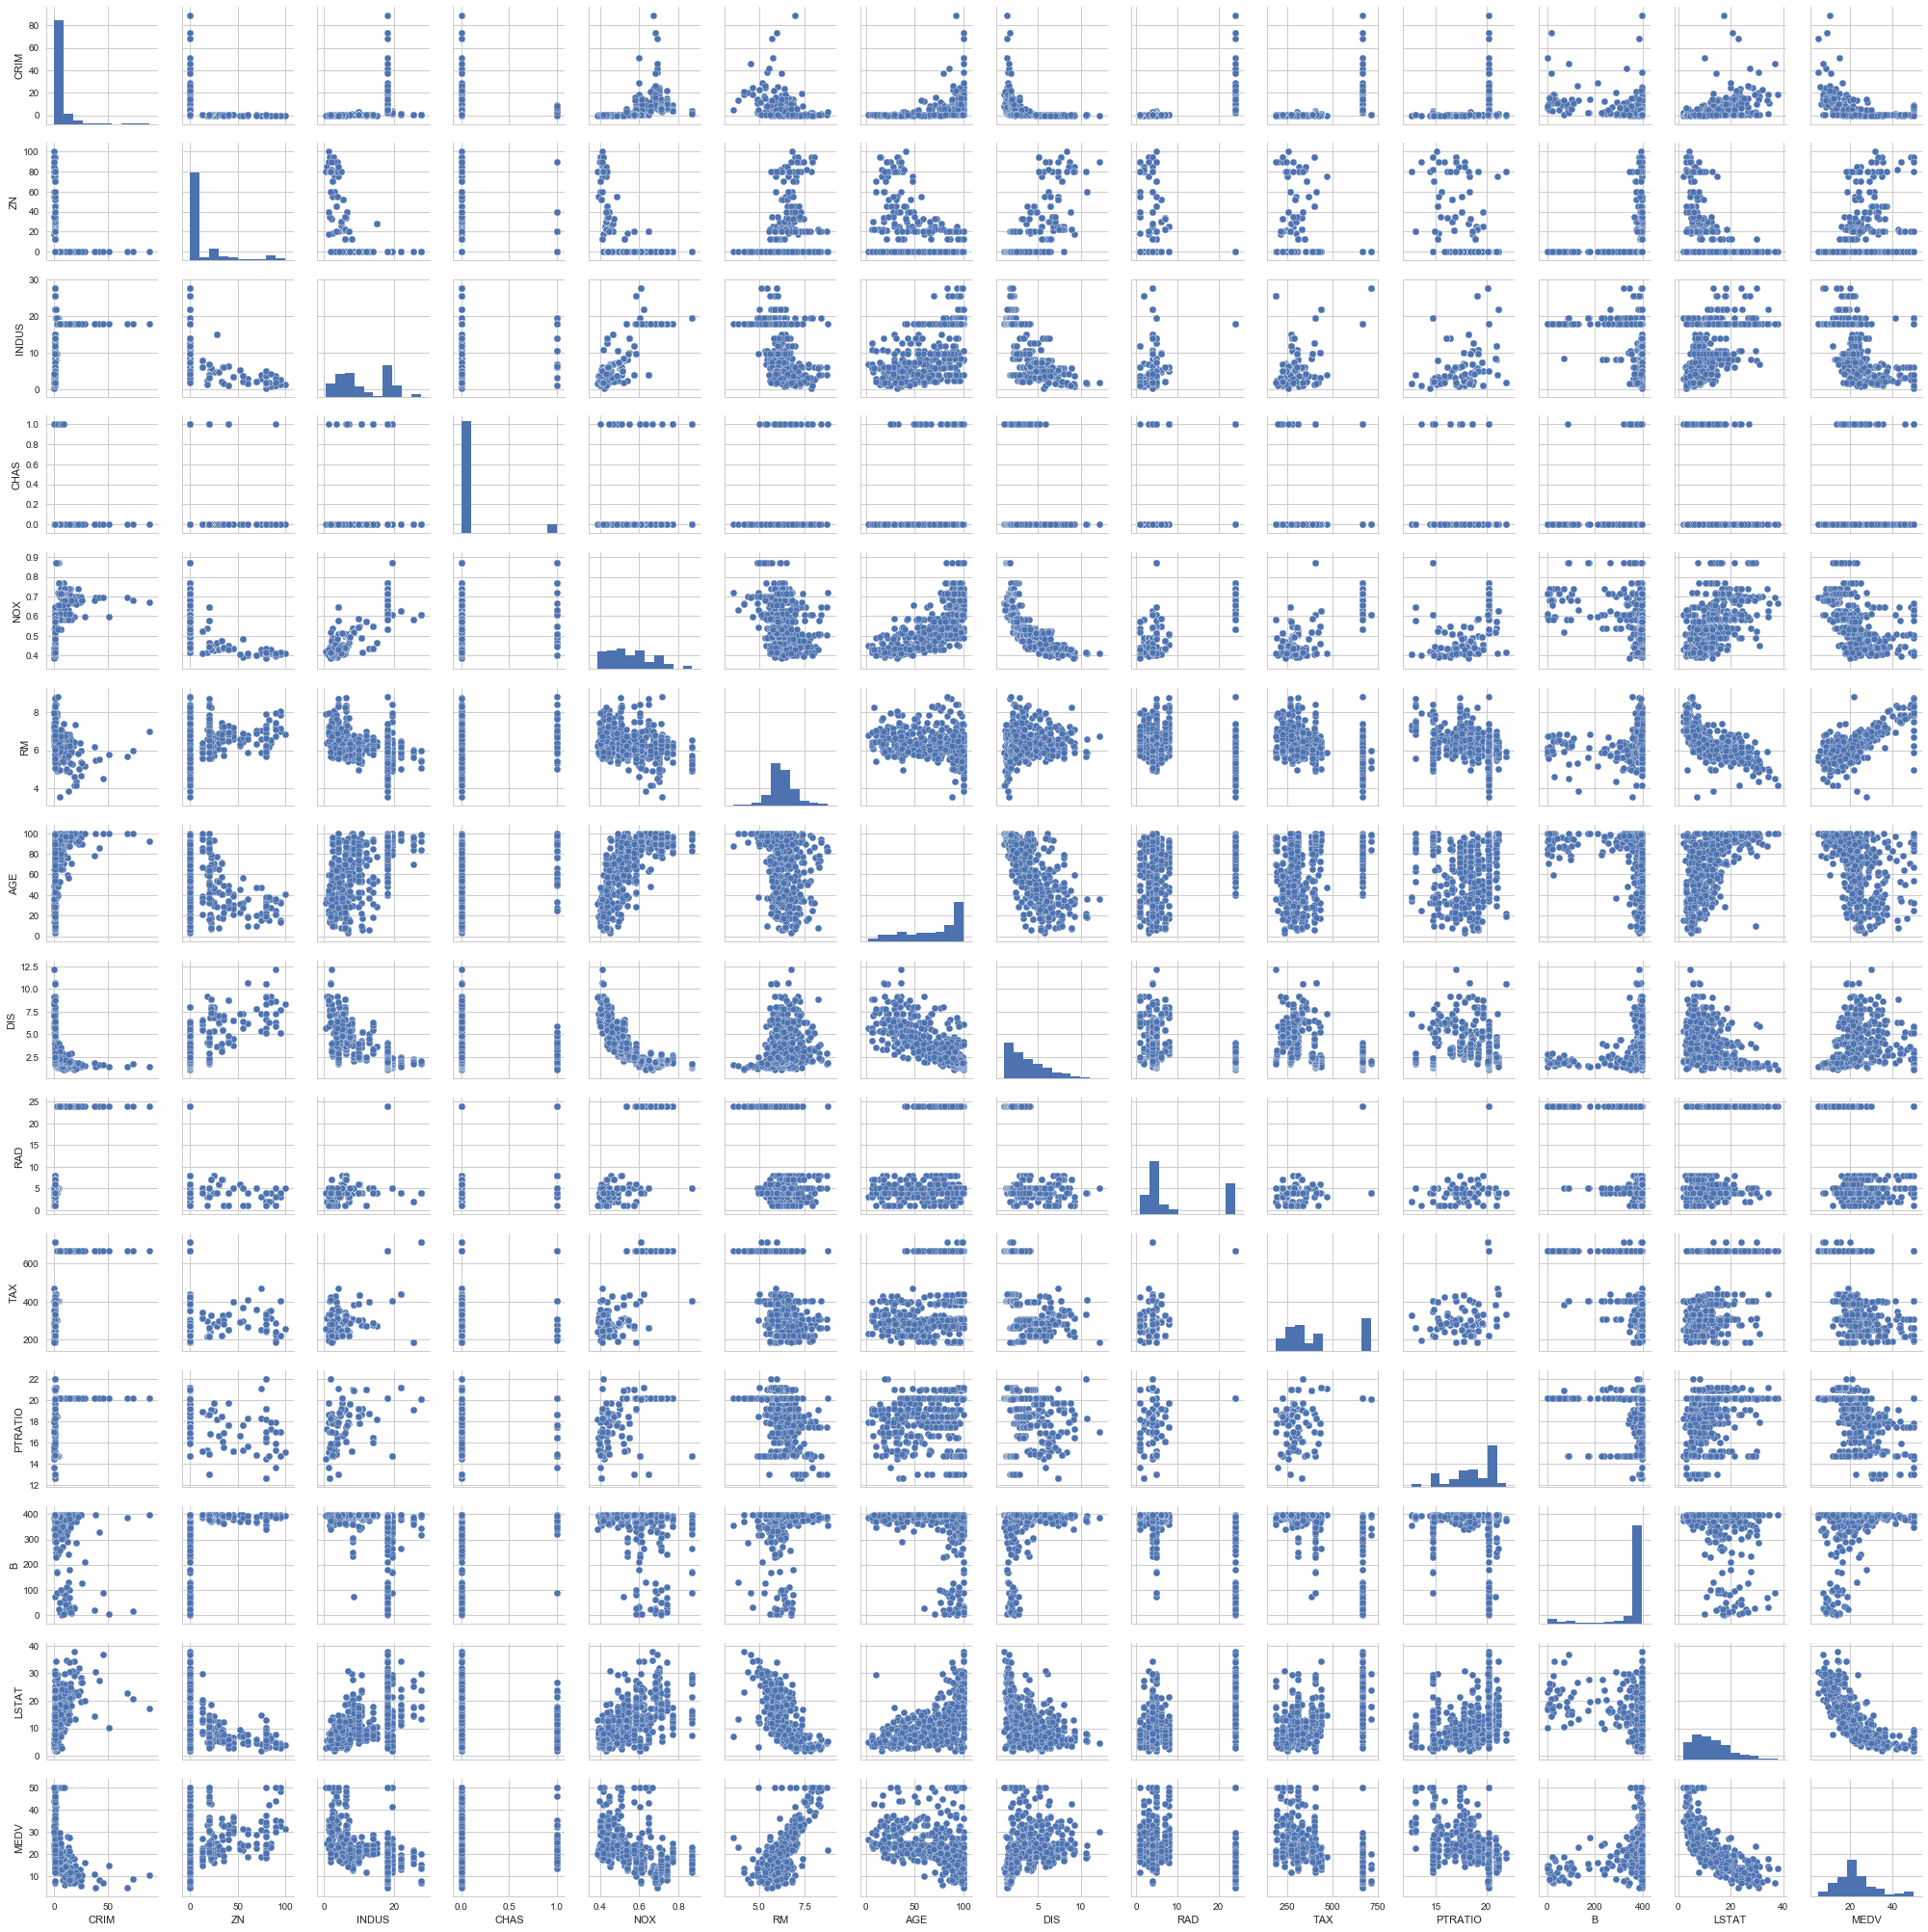

In [11]:
sns.pairplot(df,size=2);

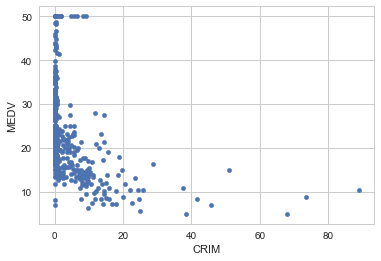

In [12]:
df.plot( x="CRIM", y="MEDV", kind='scatter');

Text(0.5,1,'Relationship between CRIM and Price')

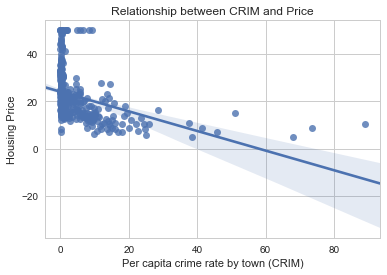

In [13]:
sns.regplot(x='CRIM',y='MEDV', data = df)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")


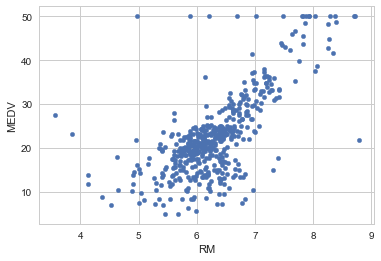

In [14]:
df.plot('RM','MEDV',kind='scatter');

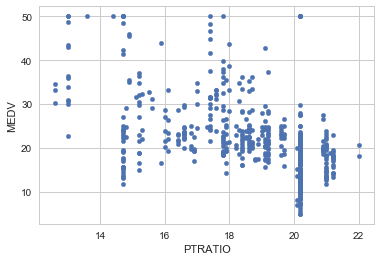

In [15]:
df.plot('PTRATIO','MEDV',kind='scatter');

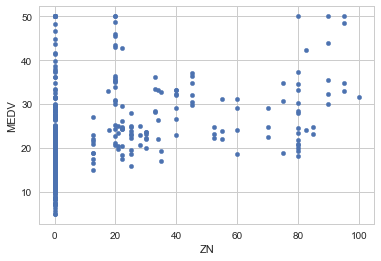

In [16]:
df.plot('ZN','MEDV',kind='scatter');

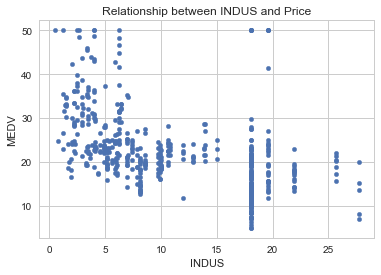

In [17]:
df.plot('INDUS','MEDV',kind='scatter', title="Relationship between INDUS and Price");

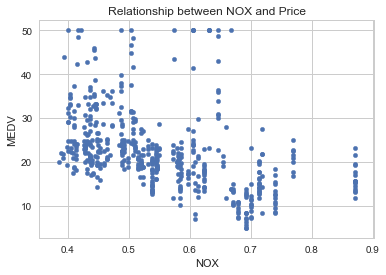

In [18]:
df.plot('NOX','MEDV',kind='scatter', title="Relationship between NOX and Price");

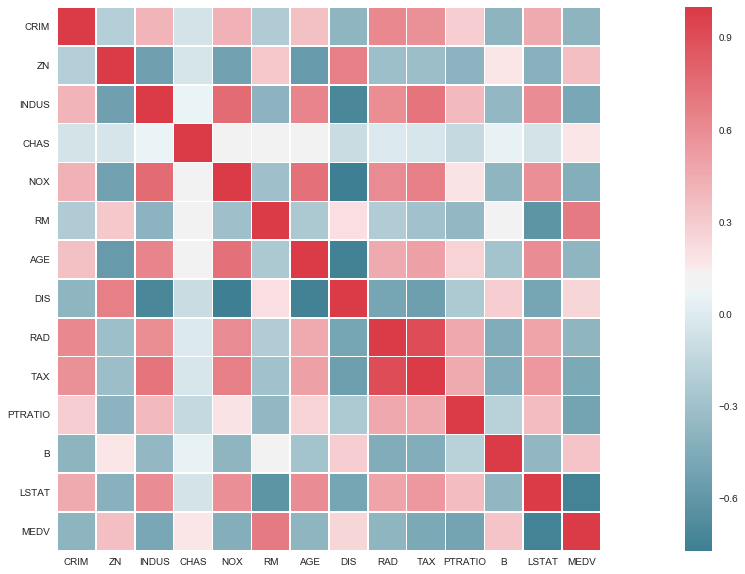

In [19]:
#Correlation Matrix

sns.set(style="white")

df_corr= df[:]
# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax)

# RAD and TAX are highly co-related.
#Price negatively corelated with LSTAT(Strong),PTRATIO(Strong),TAX(high), INDUS(High), CRIM(Highly) and 
#NOX highly corelated with RM.
#Also Price positively corelated with RM(High), ZN(High), CHAS(Medium), DIS(MEDIUM) & B(Medium)

Text(0.5,1,'Relationship between average number of rooms per dwelling and PRICE')

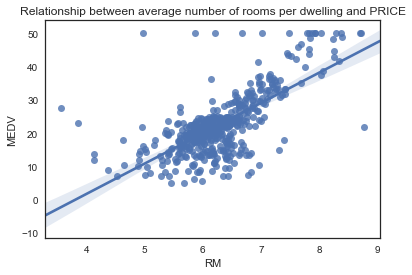

In [20]:
sns.regplot(y="MEDV", x="RM", data=df, fit_reg = True);
plt.title("Relationship between average number of rooms per dwelling and PRICE")

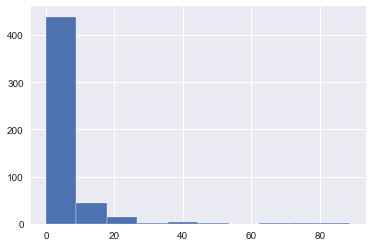

In [21]:
sns.set()
plt.hist(df['CRIM'], ec='w');

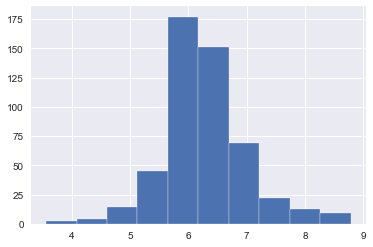

In [22]:
plt.hist(df['RM'], ec='w');

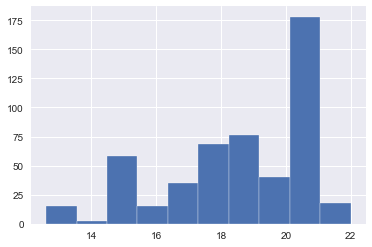

In [23]:
plt.hist(df['PTRATIO'], ec='w');

# References

- https://www.ritchieng.com/machine-learning-project-boston-home-prices/
- https://github.com/chatkausik/Linear-Regression-using-Boston-Housing-data-set/blob/master/Mini_Project_Linear_Regression.ipynb
- https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb

In [25]:
import numpy as np
import pandas as pd
import sklearn as sk

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()

In [28]:
bos = pd.DataFrame(boston.data)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [35]:
X = bos.iloc[:,:-1] # drop PRICE column

In [37]:
lm.fit(X, bos.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lm.predict(X)[0:5]

array([ 9.04935799, 11.30305903,  6.38573927,  5.66959979,  5.74403161])

In [40]:
bos.iloc[:,-1][0:5]

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: 12, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)